**Name : Bhargav Pandya**

**Student Id : 202218055**

**Assignment - 01**

**Implement the graphical method for solving linear programming problems
for two variables.**

**1. Plot the feasible region.**

**2. Find the optimum solution using**

**(a) Corner/extreme point method**

**(b) Iso profit method**

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [14]:
#Here we solve for two variables x and y 
z = []
a = int(input("Coefficient of x : "))
b = int(input("Coefficient of y : "))
z.append(a)
z.append(b)
print(z)

Coefficient of x : 150
Coefficient of y : 100
[150, 100]


In [15]:
#We get number of equations and equations from  user
n = int(input("Enter number of equation ax + by = c form,other than x>=0 and y>=0: "))
k = []
C = []
sign = []
for i in range(n):
  a_i = []
  a1  = int(input("Enter coefficient of x : "))
  b1  = int(input("Enter coefficient of y : "))
  c  = int(input("constant : "))
  s = input("Sign : ")
  sign.append(s)
  if s=='>=':
    a_i.append(-a1)
    a_i.append(-b1)
    C.append(-c)
  else:
    a_i.append(a1)
    a_i.append(b1)
    C.append(c)
  k.append(a_i)
  print("a_{} = ".format(i),a_i)

Enter number of equation ax + by = c form,other than x>=0 and y>=0: 2
Enter coefficient of x : 8
Enter coefficient of y : 5
constant : 60
Sign : <=
a_0 =  [8, 5]
Enter coefficient of x : 4
Enter coefficient of y : 5
constant : 40
Sign : <=
a_1 =  [4, 5]


In [16]:
print(k)
print(C)

[[8, 5], [4, 5]]
[60, 40]


In [17]:
#First we finding all equations intersection point
#then we get corner point of feasible region
t = []
for i in range(n):
  a1 = np.array([k[i],[0,1]])
  b1 = np.array([C[i],0])
  t.append(np.linalg.solve(a1,b1))

  c1 = np.array([[1,0],k[i]])
  d1 = np.array([0,C[i]])
  t.append(np.linalg.solve(c1,d1))

for i in range(n-1):
  a = np.array([k[i],k[i+1]])
  b = np.array([C[i],C[i+1]])
  t.append(np.linalg.solve(a,b)) 

a = np.array([[1,0],[0,1]])
b = np.array([0,0])
t.append(np.linalg.solve(a,b))
print("All equations intersecting points : ",t)

corner = []
for i in range(len(t)):
  count = 0
  for j in range(n):
    if ((k[j][0]*t[i][0])+(k[j][1]*t[i][1])<=C[j]):
      count += 1
  if count==n:
    corner.append(t[i])
print("Corner points of feasible region : ",corner)

All equations intersecting points :  [array([7.5, 0. ]), array([ 0., 12.]), array([10.,  0.]), array([0., 8.]), array([5., 4.]), array([0., 0.])]
Corner points of feasible region :  [array([7.5, 0. ]), array([0., 8.]), array([5., 4.]), array([0., 0.])]


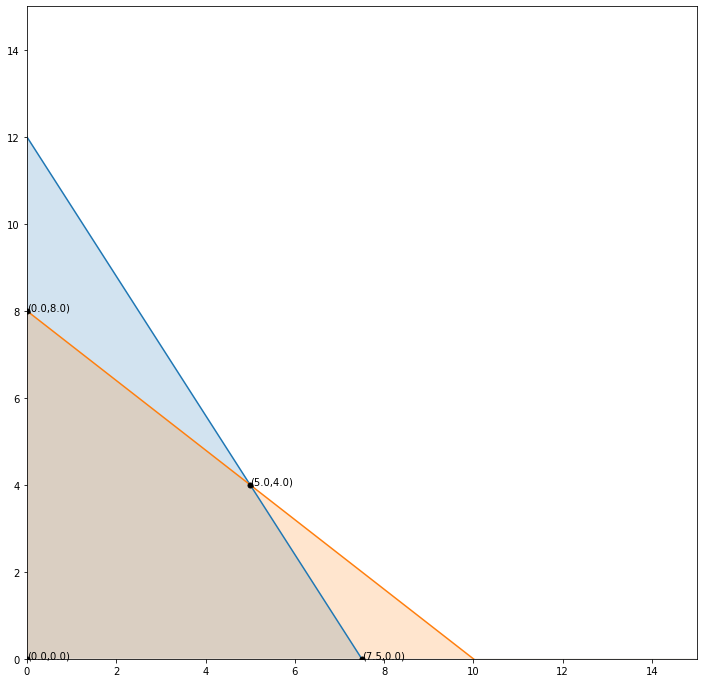

In [18]:
#plotting the graph of feasible region
#where all shaded region intersect it's feasible region
plt.figure(figsize=(12,12))
#set limit from above (low,high) point of x or y from all  intersecting points
plt.xlim(0,15) 
plt.ylim(0,15)
x = np.linspace(-15,15,100) #(-high,high,100)
for i in range(n):
  y = (C[i] - (k[i][0]*x)) / (k[i][1])
  plt.plot(x,y)
  if sign[i]=="<=":
    plt.fill_between(x, y , alpha = 0.2)
  else:
    plt.fill_betweenx(y, x, 100, where = (y > -1), alpha=0.2)
for i in corner:
    plt.plot(i[0] , i[1] , marker = 'o' , markersize = 5 , color = 'black')
    plt.text(i[0] , i[1],'({},{})'.format(i[0],i[1]))

In [19]:
#Maximize and Minimize of z using corner points
maxi = -math.inf
mini = math.inf
value = []
ns = 0
for i in corner:
  e = (i[0]*z[0])+(i[1]*z[1])
  value.append(e)
print("All values of corner point : ",value) 
for j in range(len(value)):
  if value[j]>maxi:
    maxi = value[j]
    ma_i = j
  if value[j]<mini:
    mini = value[j]
    mi_i = j
for k in sign:
    if k == ">=":
        ns += 1
if ns ==  n:
    print("Not have maximize of z")
else:
    print("Maximize of z : ",maxi)
    print("Optimum solution of maximize : [x,y] = {}".format(corner[ma_i]))
print("Minimize of z : ",mini)
print("Optimum solution of minimize : [x,y] = {}".format(corner[mi_i]))

All values of corner point :  [1125.0, 800.0, 1150.0, 0.0]
Maximize of z :  1150.0
Optimum solution of maximize : [x,y] = [5. 4.]
Minimize of z :  0.0
Optimum solution of minimize : [x,y] = [0. 0.]


300


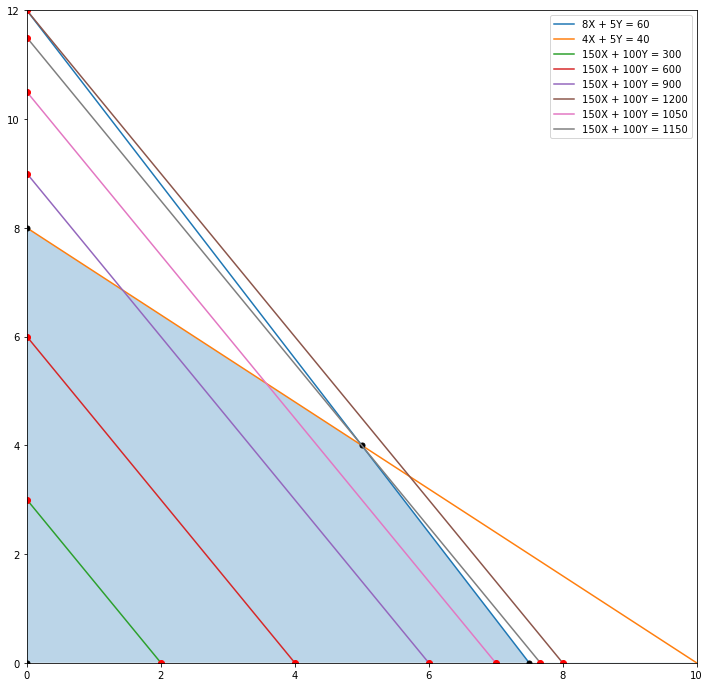

In [22]:
plt.figure(figsize=(12,12))

x = np.linspace(0,10,100)
y = (60 - (8*x)) / 5

a = np.linspace(0,10,100)
b = (40 - (4*a)) / 5

plt.xlim(0,10)
plt.ylim(0,12)
plt.plot(x , y , label = "8X + 5Y = 60")
plt.plot(a , b , label = "4X + 5Y = 40")
plt.fill_between(a, np.minimum(y,b) , alpha = 0.3)

d = []
a1 = np.array([[8,5],[4,5]])
b1 = np.array([60,40])
d.append(np.linalg.solve(a1,b1))

a1 = np.array([[8,5],[0,1]])
b1 = np.array([60,0])
d.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[4,5]])
b1 = np.array([0,40])
d.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[0,1]])
b1 = np.array([0,0])
d.append(np.linalg.solve(a1,b1))

for i in d:
    plt.plot(i[0] , i[1] , marker = 'o' , markersize = 5 , color = 'black')

# Z = 150X + 100Y
a = 150
b = 100
z = (a * b) // math.gcd(a,b)
print(z)

e = []
a1 = np.array([[150,0],[0,1]])
b1 = np.array([300,0])
e.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[0,100]])
b1 = np.array([0,300])
e.append(np.linalg.solve(a1,b1))

x1 = np.linspace(0,10,100)
y1 = (300 - (150 * x1)) / 100
plt.plot(x1 , y1 , label= "150X + 100Y = 300")
for i in e:
    plt.plot(i[0], i[1] ,marker = 'o',color = 'red')

# considering multiple of LCM ie 600 
e1 = []
a1 = np.array([[150,0],[0,1]])
b1 = np.array([600,0])
e1.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[0,100]])
b1 = np.array([0,600])
e1.append(np.linalg.solve(a1,b1))

x2 = np.linspace(0,10,100)
y2 = (600 - (150 * x2)) / 100
plt.plot(x2 , y2 , label= "150X + 100Y = 600")
for i in e1:
    plt.plot(i[0], i[1] ,marker = 'o',color = 'red')

# considering multiple of LCM ie 900 
e2 = []
a1 = np.array([[150,0],[0,1]])
b1 = np.array([900,0])
e2.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[0,100]])
b1 = np.array([0,900])
e2.append(np.linalg.solve(a1,b1))

x3 = np.linspace(0,10,100)
y3 = (900 - (150 * x2)) / 100
plt.plot(x3 , y3 , label= "150X + 100Y = 900")
for i in e2:
    plt.plot(i[0], i[1] ,marker = 'o',color = 'red')

# considering multiple of LCM ie 1200 
e3 = []
a1 = np.array([[150,0],[0,1]])
b1 = np.array([1200,0])
e3.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[0,100]])
b1 = np.array([0,1200])
e3.append(np.linalg.solve(a1,b1))

x4 = np.linspace(0,10,100)
y4 = (1200 - (150 * x2)) / 100
plt.plot(x4 , y4 , label= "150X + 100Y = 1200")
for i in e3:
    plt.plot(i[0], i[1] ,marker = 'o',color = 'red')



e4 = []
a1 = np.array([[150,0],[0,1]])
b1 = np.array([1050,0])
e4.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[0,100]])
b1 = np.array([0,1050])
e4.append(np.linalg.solve(a1,b1))

x5 = np.linspace(0,10,100)
y5 = (1050 - (150 * x2)) / 100
plt.plot(x5 , y5 , label= "150X + 100Y = 1050")
for i in e4:
    plt.plot(i[0], i[1] ,marker = 'o',color = 'red')



e5 = []
a1 = np.array([[150,0],[0,1]])
b1 = np.array([1150,0])
e5.append(np.linalg.solve(a1,b1))

a1 = np.array([[1,0],[0,100]])
b1 = np.array([0,1150])
e5.append(np.linalg.solve(a1,b1))

x6 = np.linspace(0,10,100)
y6 = (1150 - (150 * x2)) / 100
plt.plot(x6 , y6 , label= "150X + 100Y = 1150")
for i in e5:
    plt.plot(i[0], i[1] ,marker = 'o',color = 'red')


plt.legend()
plt.show()